<a href="https://colab.research.google.com/github/123ujwal/123ujwal_Netflix_movies-and-TV-shows/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df =pd.read_csv('/content/drive/MyDrive/ALMA BETTER/Netflix movies and TV shows Clustering - Ujwal Chilakandi/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.shape

(7787, 12)

In [7]:
df.info(memory_usage = 'deep' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 7.5 MB


In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*125)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary

In [10]:
DataInfoAll(df)

Dataset Shape: (7787, 12)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,show_id,object,0,7787,s1,s2
1,type,object,0,2,TV Show,Movie
2,title,object,0,7787,3%,7:19
3,director,object,2389,4049,NaN,Jorge Michel Grau
4,cast,object,718,6831,"João Miguel, Bianca Comparato, Michel Gomes, R...","Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
5,country,object,507,681,Brazil,Mexico
6,date_added,object,10,1565,"August 14, 2020","December 23, 2016"
7,release_year,int64,0,73,2020,2016
8,rating,object,7,14,TV-MA,TV-MA
9,duration,object,0,216,4 Seasons,93 min


In [11]:
df_duplicate = df[df.duplicated()]
print("Let's print all the duplicated rows as a dataframe")
df_duplicate

Let's print all the duplicated rows as a dataframe


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [12]:
NaN_Checker = pd.DataFrame({"No Of Total Values": df.shape[0] , "No of NaN values": df.isnull().sum(),
                    "%age of NaN values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,%age of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


In [13]:
plot_nan = df.isna()
plot_nan.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False


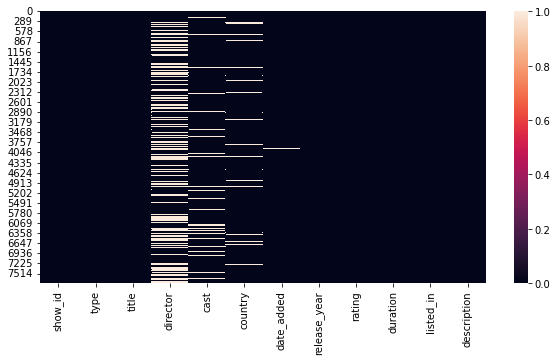

In [14]:
plt.figure( figsize = (10 , 5))
sns.heatmap(plot_nan)

<BarContainer object of 12 artists>

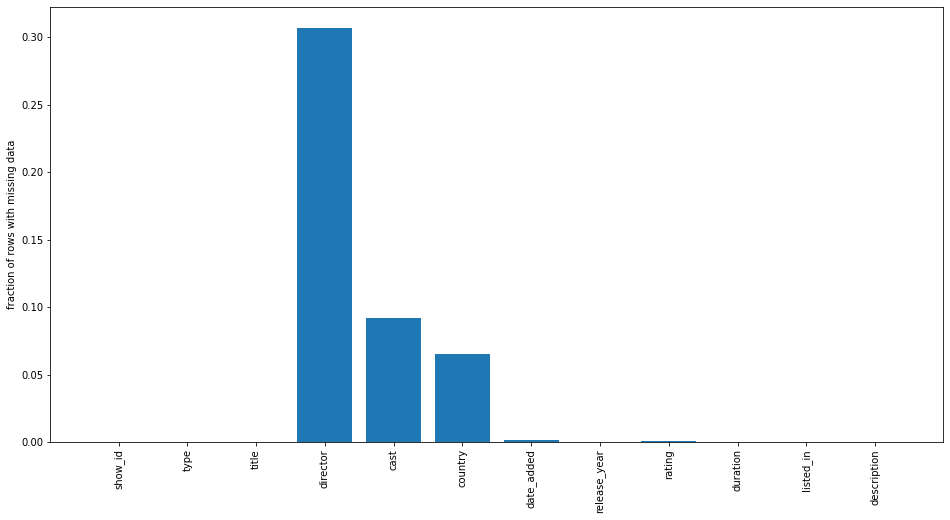

In [15]:
# null value distribution
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [16]:
df.drop(['director','cast'],axis=1, inplace=True)

In [17]:
data_added_NaN = df[df['date_added'].isna()]
data_added_NaN.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...


In [18]:
data_added_NaN.shape

(10, 10)

In [19]:
print(f"Before dropping the NaN values from date_added the shape was {df.shape}")
df.dropna(subset = [ 'date_added' ], inplace = True)
print(f"After dropping the NaN values from date_added now the shape is {df.shape}")

Before dropping the NaN values from date_added the shape was (7787, 10)
After dropping the NaN values from date_added now the shape is (7777, 10)


In [20]:
df.nunique()

show_id         7777
type               2
title           7777
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

In [21]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [22]:
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

In [23]:
yearly_movies.head()


2021     19
2020    457
2019    414
2018    386
2017    268
Name: release_year, dtype: int64

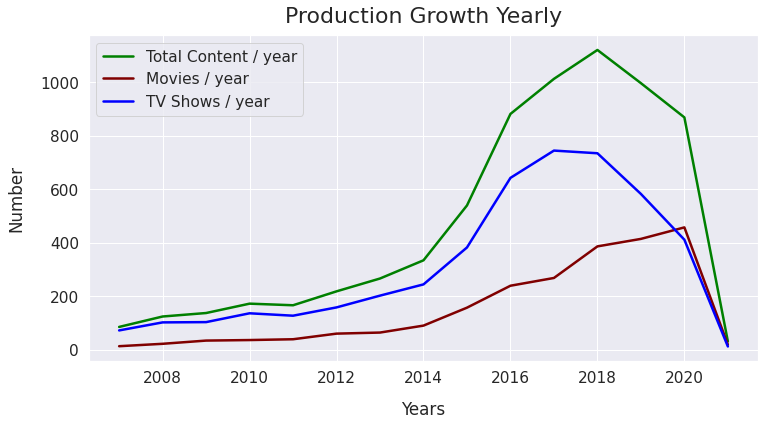

In [24]:
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);

In [25]:
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [26]:
type(df['release_year'][0])

numpy.int64

In [27]:
df['release_year'].value_counts().to_frame().T

,2018,2017,2019,2016,2020,2015,2014,2013,2012,2010,...,1969,1963,1954,1970,1956,1925,1964,1966,1947,1959
release_year,1120,1012,996,881,868,539,334,266,218,172,...,2,2,2,2,2,1,1,1,1,1


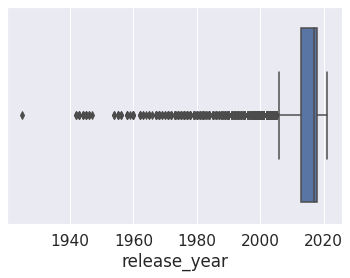

In [28]:
sns.boxplot(df.release_year)

In [29]:
type(df.release_year[0])

numpy.int64

In [30]:
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


In [31]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]

In [32]:
release_year_outliers

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,187,United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
44,s45,Movie,Æon Flux,United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an..."
94,s95,Movie,28 Days,United States,"September 30, 2020",2000,PG-13,104 min,"Comedies, Dramas",After her drunken antics result in property da...
97,s98,Movie,3 Deewarein,NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
105,s106,Movie,300 Miles to Heaven,"Denmark, France, Poland","October 1, 2019",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br..."
...,...,...,...,...,...,...,...,...,...,...
7745,s7746,Movie,"Yours, Mine and Ours",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
7749,s7750,TV Show,Yu-Gi-Oh!,Japan,"July 8, 2020",2005,TV-Y7,2 Seasons,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...
7754,s7755,Movie,Yuva,India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...
7760,s7761,Movie,Zaki Chan,Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...


In [33]:
# 15 percentile value is 2009
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

In [34]:
df.release_year.describe()

count    7777.000000
mean     2016.260846
std         2.726841
min      2009.000000
25%      2013.935965
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

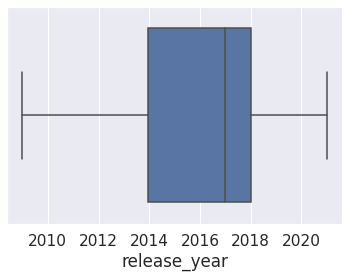

In [35]:
sns.boxplot(df.release_year)

In [36]:
print(f"Datatype of release_year = ",type(df.release_year.iloc[0]))
df.release_year = df.release_year.astype("int64")
print(f"Datatype of release_year = ",type(df.release_year.iloc[0]))

Datatype of release_year =  <class 'numpy.float64'>
Datatype of release_year =  <class 'numpy.int64'>


In [37]:
df.title.nunique()

7777

In [38]:
df.shape[0]

7777

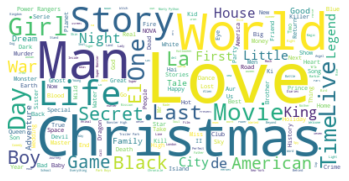

In [39]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
df.country.nunique()

681

In [41]:
df.country.value_counts().rename_axis('Country').reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
Country,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,2549,923,396,225,183,177,134,115,101,100,...,1,1,1,1,1,1,1,1,1,1


In [42]:
df.country.isna().sum()

506

In [43]:
#mode value of country column
df.country.mode()[0]

'United States'

In [44]:
df.country[df.country.isna()] = df.country.mode()[0]

In [45]:
df.country[df.country.isna()]

Series([], Name: country, dtype: object)

In [46]:
df.country.isna().sum()

0

In [47]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [48]:
production_country[:5]

[('Finland', 11, 4, 7),
 ('Slovakia', 1, 0, 1),
 ('Iran', 4, 0, 4),
 ('Liechtenstein', 1, 0, 1),
 ('Iraq', 2, 0, 2)]

In [49]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [50]:
#Top 5 countries
top_countries=country_df.head()
top_countries

,country,Productions,TV-Shows,Movies
0,United States,3797,1136,2661
1,India,990,75,915
2,United Kingdom,722,255,467
3,Canada,412,126,286
4,France,349,84,265


In [51]:
top_countries.T

,0,1,2,3,4
country,United States,India,United Kingdom,Canada,France
Productions,3797,990,722,412,349
TV-Shows,1136,75,255,126,84
Movies,2661,915,467,286,265


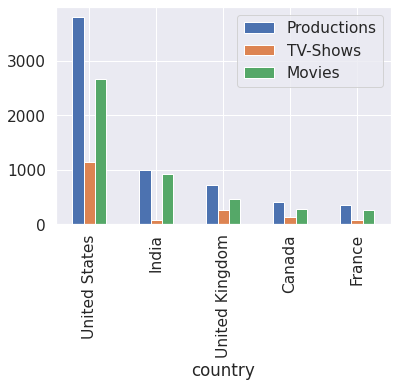

In [52]:
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

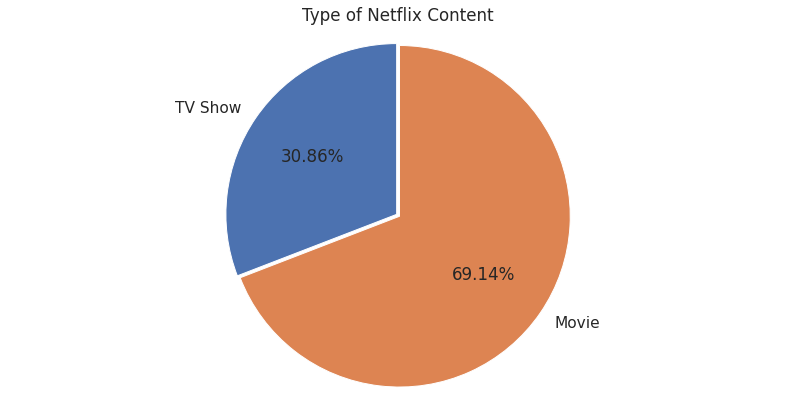

In [53]:
#Plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

In [54]:
df.duration.isna().sum()

0

In [55]:
type(df.duration.iloc[0][0])

str

In [56]:
df.duration.nunique()

216

In [57]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,13 Seasons,9 min,182 min,224 min,233 min,191 min
duration,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [58]:
def convert_seasons_to_min(value):
  """
  This function will calculate no of total mins as per season no.
  Here our assumptions are
    1. on average 5 episodes are there in a season.
    2. each episode avg time is 55 mins.
  """
  no_of_avg_episode = 5
  if "Seasons" in value:
    #containing more than 1 seasons
    value = value.replace("Seasons",'')
    value = value.replace(" ","")
    total_seasons = int(value)
    each_season_mins = ( no_of_avg_episode * 55 )
    total_mins = (total_seasons * each_season_mins)
    return total_mins

  elif "Season" in value:
    # containing only 1 season
    value = value.replace("Season",'')
    value = value.replace(" ","")
    total_mins = (no_of_avg_episode * 55)
    return total_mins

In [59]:
#Checking the function
convert_seasons_to_min("4 Seasons")

1100

In [60]:
def all_the_duration_in_minutes():
  """
  This function will convert all the duration 
  whether it's in minutes or season format to minute
  """
  # replaced all the min with null string
  df['duration'] = df.duration.str.replace(" min" , "")
  # this time_list will contain all the value
  time_list =[]
  for time in df.duration.values:
    if "Season" in time:
      #time is containing Season
      # calling convert_seasons_to_min function to convert 
      # season to total min 
      time = convert_seasons_to_min(time)
    else:
      #replacing single space with ""
      time = time.replace(" ","")
    #appending time (it's not containing words like min or seasons)
    time_list.append(time)

  #converting all the time into integer format
  time_list = [ int(Time) for Time in time_list]

  #Assigning time_list to df.duration
  df.duration = time_list

In [61]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,13 Seasons,9 min,182 min,224 min,233 min,191 min
duration,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [62]:
all_the_duration_in_minutes()

In [63]:
df.duration.value_counts().to_frame().T


,275,550,825,90,93,94,91,95,92,97,...,193,13,214,8,3575,9,182,224,233,191
duration,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


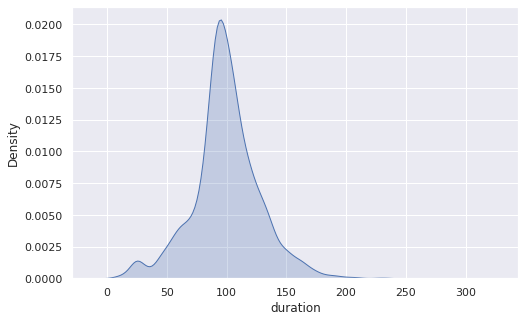

In [64]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
sns.kdeplot(data = df.duration[df['type'] == 'Movie'] , shade=True)

In [65]:
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

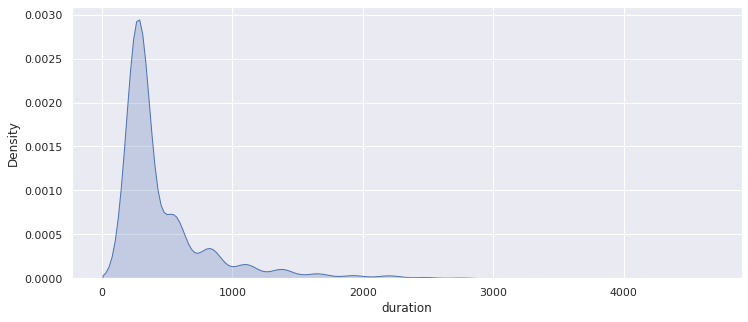

In [66]:
sns.set(style="darkgrid")
plt.figure(figsize = (12,5))
sns.kdeplot(data = df.duration[df['type'] == 'TV Show'] , shade=True)

In [67]:
df.listed_in.nunique()

491

In [69]:
df.listed_in.isna().sum()

0

In [70]:
df.listed_in.value_counts().to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,204,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


In [71]:
categories = ", ".join(df['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [72]:
len(categories)

17051

In [73]:
len(set(categories))

42

In [74]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [75]:
category_wise_count

{'Action & Adventure': 721,
 'Anime Features': 57,
 'Anime Series': 147,
 'British TV Shows': 231,
 'Children & Family Movies': 532,
 'Classic & Cult TV': 25,
 'Classic Movies': 103,
 'Comedies': 1471,
 'Crime TV Shows': 426,
 'Cult Movies': 59,
 'Documentaries': 786,
 'Docuseries': 352,
 'Dramas': 2106,
 'Faith & Spirituality': 57,
 'Horror Movies': 312,
 'Independent Movies': 673,
 'International Movies': 2437,
 'International TV Shows': 1198,
 "Kids' TV": 412,
 'Korean TV Shows': 150,
 'LGBTQ Movies': 90,
 'Movies': 56,
 'Music & Musicals': 321,
 'Reality TV': 222,
 'Romantic Movies': 531,
 'Romantic TV Shows': 333,
 'Sci-Fi & Fantasy': 218,
 'Science & Nature TV': 85,
 'Spanish-Language TV Shows': 146,
 'Sports Movies': 196,
 'Stand-Up Comedy': 329,
 'Stand-Up Comedy & Talk Shows': 52,
 'TV Action & Adventure': 149,
 'TV Comedies': 518,
 'TV Dramas': 703,
 'TV Horror': 69,
 'TV Mysteries': 90,
 'TV Sci-Fi & Fantasy': 75,
 'TV Shows': 12,
 'TV Thrillers': 50,
 'Teen TV Shows': 60,
 

In [76]:
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52)]

In [77]:
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('Movies', 56)]

In [78]:
sorted_category_wise_count[-5:]

[('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [79]:
top_10_most_occurred_categories = sorted_category_wise_count[-10:]

In [80]:
top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [81]:
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

In [82]:
top_10_most_occurred_category_name

['Romantic Movies',
 'Children & Family Movies',
 'Independent Movies',
 'TV Dramas',
 'Action & Adventure',
 'Documentaries',
 'International TV Shows',
 'Comedies',
 'Dramas',
 'International Movies']

In [83]:
top_10_most_occurred_category_count

[531, 532, 673, 703, 721, 786, 1198, 1471, 2106, 2437]

<Figure size 1152x576 with 0 Axes>

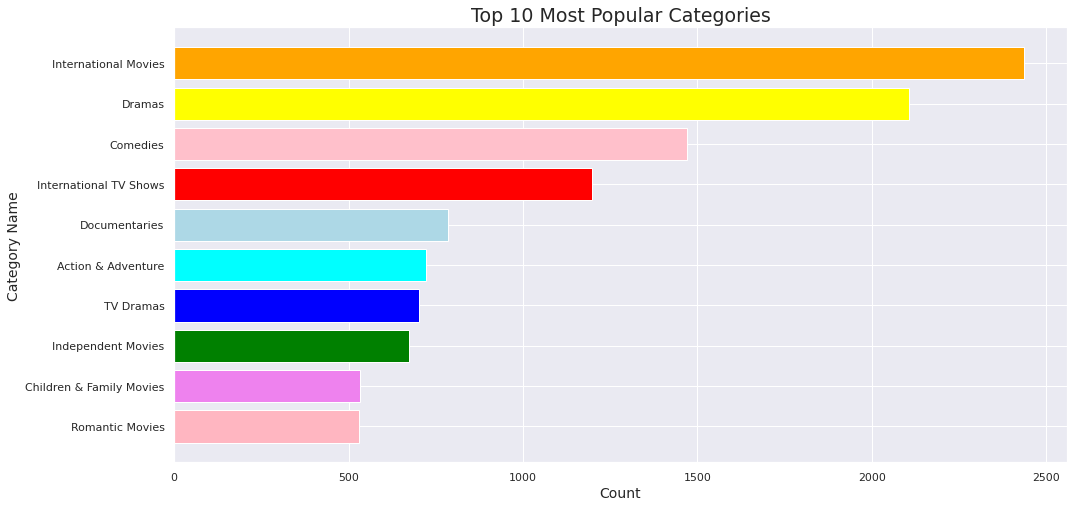

<Figure size 1152x576 with 0 Axes>

In [84]:
plt.figure( figsize = (16,8))
color=['lightpink', 'violet', 'green', 'blue', 'cyan' , "lightblue" ,'red', 'pink', 'yellow', 'orange']
plt.barh(top_10_most_occurred_category_name , top_10_most_occurred_category_count ,
        color= color)
plt.title("Top 10 Most Popular Categories",fontsize = 19)
plt.xlabel("Count", fontsize = 14 )
plt.ylabel("Category Name" , fontsize = 14 )
plt.figure( figsize = (16,8))

In [85]:
type(df.listed_in.iloc[0])

str

In [86]:
(df.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [87]:
(df.listed_in.iloc[0]).split(",")

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [88]:
len((df.listed_in.iloc[0]).split(","))

3

In [89]:
no_of_category = []
for categories in df.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [90]:
df['no_of_category'] = no_of_category

In [91]:
df[['listed_in' , 'no_of_category']].head()

,listed_in,no_of_category
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,"Dramas, International Movies",2
2,"Horror Movies, International Movies",2
3,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,Dramas,1


In [92]:
df.no_of_category.unique()

array([3, 2, 1])

In [93]:
df.no_of_category.value_counts()

3    3295
2    2684
1    1798
Name: no_of_category, dtype: int64

Text(0, 0.5, 'Count')

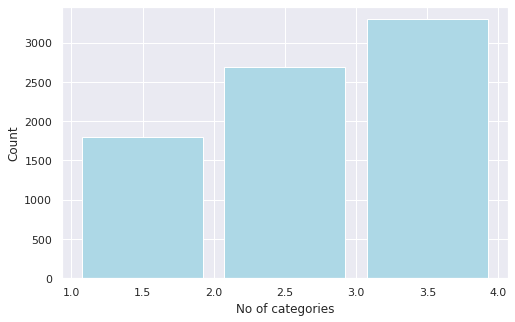

In [94]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
plt.hist(df.no_of_category , bins=[1,2,3,4] , range = (1 ,4) , rwidth = 0.85, color ='lightblue')
plt.xlabel("No of categories")
plt.ylabel("Count")

In [95]:
df.date_added.head(3)

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
Name: date_added, dtype: object

In [96]:
df['date_added_month'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df[['date_added' , 'date_added_month']].head()

,date_added,date_added_month
0,"August 14, 2020",August
1,"December 23, 2016",December
2,"December 20, 2018",December
3,"November 16, 2017",November
4,"January 1, 2020",January


In [97]:
month_df=df['date_added_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
ab = month_df.loc[0:11]
ab

,Month_Name,date_added_month
0,December,817
1,October,780
2,January,746
3,November,730
4,March,661
5,September,614
6,August,612
7,April,596
8,July,592
9,June,538


In [98]:
month_names = ab.Month_Name.values
month_wise_count = ab.date_added_month.values

Text(0, 0.5, 'Count')

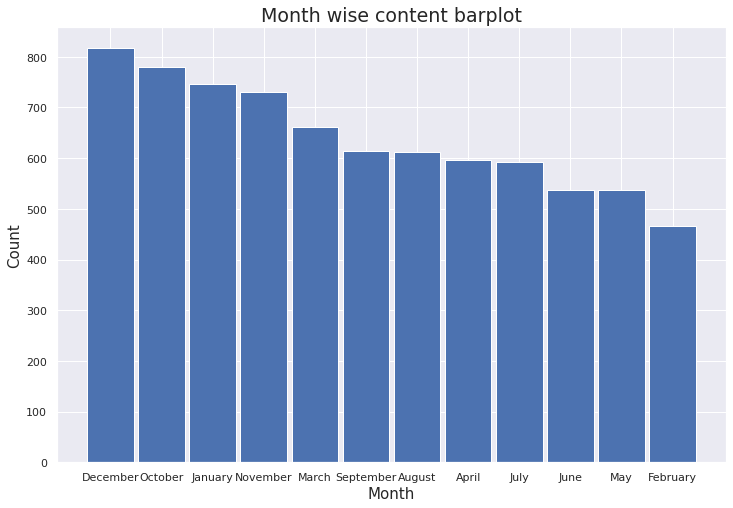

In [99]:
plt.figure(figsize = (12 ,8 ))
plt.bar(month_names , month_wise_count, width = 0.91)
plt.title("Month wise content barplot" , fontsize = 19)
plt.xlabel("Month" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)

In [100]:
df.date_added_month.value_counts().to_frame().T

,December,October,January,November,March,September,August,April,July,June,May,February,
date_added_month,817,780,746,730,661,614,612,596,592,538,537,466,88


In [101]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month'],
      dtype='object')

In [102]:
df.show_id.isna().sum()

0

In [103]:
df.show_id.value_counts()

s1       1
s5175    1
s5203    1
s5202    1
s5201    1
        ..
s2594    1
s2593    1
s2592    1
s2591    1
s7787    1
Name: show_id, Length: 7777, dtype: int64

In [104]:
df.shape[0]

7777

In [105]:
type(df.show_id.iloc[0])

str

In [106]:
df.rating.value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [107]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [108]:
df_tv_show = df[df['type']== 'TV Show' ]
df_tv_show.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,275,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,3,July


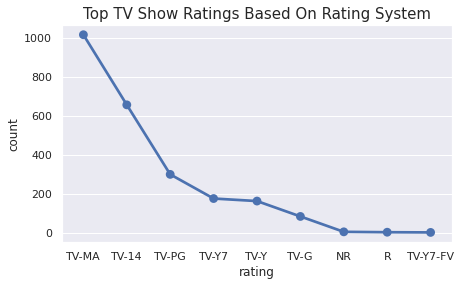

In [109]:
#Pointplot on top tv show ratings 
tv_ratings = df_tv_show.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

In [110]:
df_movies = df[df['type'] == 'Movie' ]
df_movies.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2,December


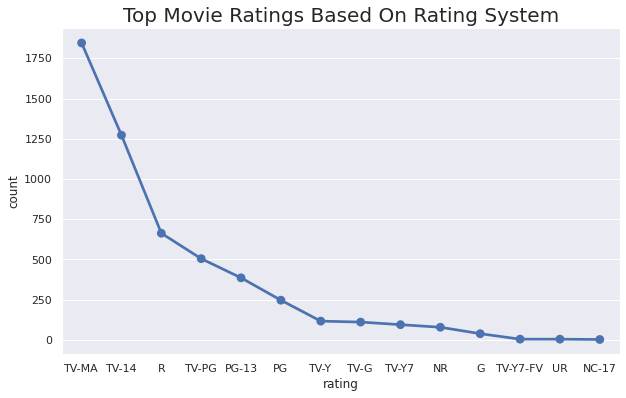

In [111]:
#Pointplot on top tv show ratings 
tv_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

In [112]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month'],
      dtype='object')

In [113]:
df.description.iloc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [114]:
First_des = df.description.iloc[0]
First_des

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [115]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [118]:
import nltk 
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [120]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [121]:
df['description'] = df['description'].apply(remove_punctuation)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,A brilliant group of students become cardcount...,1,January


In [122]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [123]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [124]:
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


In [125]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [126]:
df['description'] = df['description'].apply( remove_stopwords )
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,brilliant group students become cardcounting e...,1,January


In [127]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [128]:
dictionary

dict_items([('future', 7153), ('elite', 5642), ('inhabit', 8945), ('island', 9221), ('paradise', 12668), ('far', 6398), ('crowded', 4230), ('slums', 16086), ('get', 7349), ('one', 12297), ('chance', 3060), ('join', 9439), ('saved', 15190), ('squalor', 16502), ('devastating', 4825), ('earthquake', 5491), ('hits', 8306), ('mexico', 11098), ('city', 3326), ('trapped', 17904), ('survivors', 17050), ('walks', 18862), ('life', 10168), ('wait', 18839), ('rescued', 14507), ('trying', 18046), ('desperately', 4778), ('stay', 16611), ('alive', 781), ('army', 1222), ('recruit', 14227), ('found', 6937), ('dead', 4492), ('fellow', 6524), ('soldiers', 16211), ('forced', 6873), ('confront', 3780), ('terrifying', 17426), ('secret', 15378), ('thats', 17480), ('haunting', 8010), ('jungle', 9534), ('training', 17861), ('camp', 2751), ('postapocalyptic', 13347), ('world', 19299), ('ragdoll', 13946), ('robots', 14833), ('hide', 8185), ('fear', 6477), ('dangerous', 4419), ('machines', 10525), ('exterminate',

In [129]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [130]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [131]:
vocab_before_stemming.head(4)

,Word,count
18855,şeref,19593
10390,ōarai,19592
12377,łukasz,19591
11101,überelite,19590


In [132]:
vocab_before_stemming.head(20).T

,18855,10390,12377,11101,11673,13288,6584,18193,10428,9867,19555,6536,19590,16413,7192,18395,19580,19587,10293,18069
Word,şeref,ōarai,łukasz,überelite,über,ömer,émile,ángel,álvaro,álex,zé,zurich,zumbo,zulu,zuhu,zuckerberg,zoé,zozo,zoya,zorro
count,19593,19592,19591,19590,19589,19588,19587,19586,19585,19584,19583,19582,19581,19580,19579,19578,19577,19576,19575,19574


In [133]:
vocab_before_stemming.tail(4)

,Word,count
639,100,3
7616,10,2
7962,009,1
6867,007,0


In [134]:
top15_most_ocurred_vacab = vocab_before_stemming.head(15)

In [135]:
top15_most_occurred_words = top15_most_ocurred_vacab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [136]:
top15_most_occurred_words_count = top15_most_ocurred_vacab['count'].values 
top15_most_occurred_words_count

array([19593, 19592, 19591, 19590, 19589, 19588, 19587, 19586, 19585,
       19584, 19583, 19582, 19581, 19580, 19579])

<BarContainer object of 15 artists>

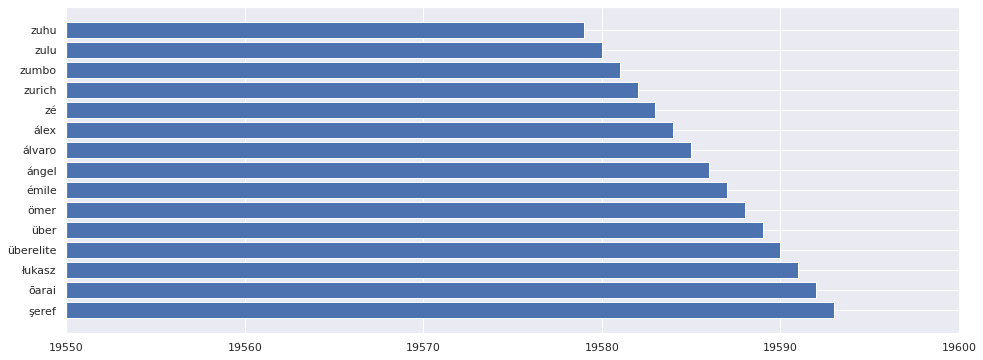

In [137]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(19550, 19600)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

In [138]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [139]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [140]:
#Stemming for description
df['description'] = df['description'].apply( Apply_stemming )
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January


In [141]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [142]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [143]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [144]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)

In [145]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [146]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values 
top15_most_occurred_words_count

array([14240, 14239, 14238, 14237, 14236, 14235, 14234, 14233, 14232,
       14231, 14230, 14229, 14228, 14227, 14226])

<BarContainer object of 15 artists>

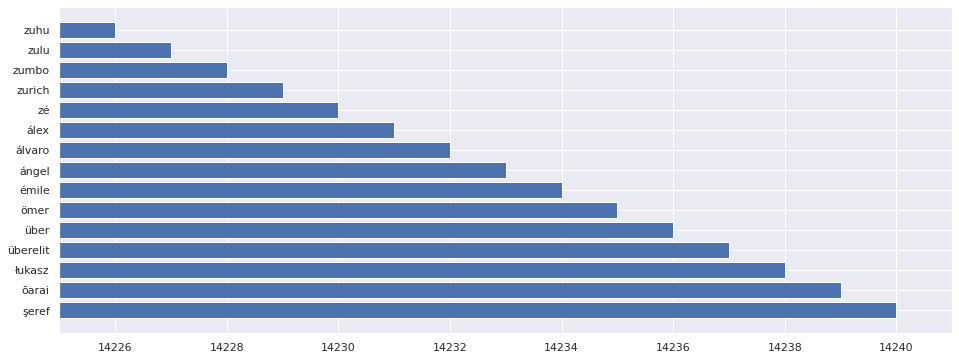

In [147]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(14225, 14241)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

In [148]:
df['Length(description)'] = df['description'].apply(lambda x: len(x))

In [149]:
df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,December,102


In [150]:
df.description.iloc[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

In [151]:
len(df.description.iloc[0])

82

In [152]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month', 'Length(description)'],
      dtype='object')

In [153]:
df['listed_in'] = df['listed_in'].apply(remove_punctuation)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,International TV Shows TV Dramas TV SciFi Fan...,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,Dramas International Movies,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,Horror Movies International Movies,armi recruit found dead fellow soldier forc co...,2,December,102
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,Action Adventure Independent Movies SciFi Fa...,postapocalypt world ragdol robot hide fear dan...,3,November,89
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January,99


In [154]:
#Remove stopwords for listed_in
df['listed_in'] = df['listed_in'].apply( remove_stopwords )
df.head( 2 )

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,dramas international movies,devast earthquak hit mexico citi trap survivor...,2,December,88


In [155]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [156]:
dictionary

dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])